In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
df = pd.read_csv("C:\PyProjects\data\Stack Overflow Annual Developer Survey-2019/survey_results_public.csv", index_col="Respondent", usecols=["Respondent","MainBranch", "EdLevel"])

df["MainBranch"] = df["MainBranch"].str.replace("I am not primarily a developer, but I write code sometimes as part of my work","I am not primarily a developer, but I \nwrite code sometimes as part of my work")
df["MainBranch"] = df["MainBranch"].str.replace('I used to be a developer by profession, but no longer am','I used to be a developer by profession, \nbut no longer am')
df["EdLevel"] = df["EdLevel"].str.replace("Some college/university study without earning a degree","Some college/university study without \nearning a degree")
df["EdLevel"] = df["EdLevel"].replace("Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)","Secondary school (e.g. American high school, \nGerman Realschule or Gymnasium, etc.)")

df["MainBranch"] = df["MainBranch"].astype("category")
df["EdLevel"] = df["EdLevel"].astype("category")

df.head()

,MainBranch,EdLevel
Respondent,,
1,I am a student who is learning to code,Primary/elementary school
2,I am a student who is learning to code,"Secondary school (e.g. American high school, \..."
3,"I am not primarily a developer, but I \nwrite ...","Bachelor’s degree (BA, BS, B.Eng., etc.)"
4,I am a developer by profession,"Bachelor’s degree (BA, BS, B.Eng., etc.)"
5,I am a developer by profession,"Bachelor’s degree (BA, BS, B.Eng., etc.)"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88883 entries, 1 to 88863
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   MainBranch  88331 non-null  category
 1   EdLevel     86390 non-null  category
dtypes: category(2)
memory usage: 868.6 KB


In [4]:
df_0 = df.groupby(["EdLevel", "MainBranch"]).size().to_frame(name='count').reset_index()
df_0.head()

,EdLevel,MainBranch,count
0,Associate degree,I am a developer by profession,2157
1,Associate degree,I am a student who is learning to code,386
2,Associate degree,"I am not primarily a developer, but I \nwrite ...",234
3,Associate degree,I code primarily as a hobby,84
4,Associate degree,"I used to be a developer by profession, \nbut ...",65


In [5]:
top_countries = df_0.groupby("EdLevel").sum().sort_values(by="count", ascending=False).head(6)
lists = list(top_countries.index)
lists

['Bachelor’s degree (BA, BS, B.Eng., etc.)',
 'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
 'Some college/university study without \nearning a degree',
 'Secondary school (e.g. American high school, \nGerman Realschule or Gymnasium, etc.)',
 'Associate degree',
 'Other doctoral degree (Ph.D, Ed.D., etc.)']

In [6]:
df_1 = pd.DataFrame()
for i in range(0,len(lists)):
    data_2 = df_0.groupby("EdLevel").get_group(lists[i])
    df_1 = df_1.append(data_2)
df_1.head()

,EdLevel,MainBranch,count
5,"Bachelor’s degree (BA, BS, B.Eng., etc.)",I am a developer by profession,32582
6,"Bachelor’s degree (BA, BS, B.Eng., etc.)",I am a student who is learning to code,2562
7,"Bachelor’s degree (BA, BS, B.Eng., etc.)","I am not primarily a developer, but I \nwrite ...",2657
8,"Bachelor’s degree (BA, BS, B.Eng., etc.)",I code primarily as a hobby,601
9,"Bachelor’s degree (BA, BS, B.Eng., etc.)","I used to be a developer by profession, \nbut ...",627


In [7]:
df_1["EdLevel"].unique()

[Bachelor’s degree (BA, BS, B.Eng., etc.), Master’s degree (MA, MS, M.Eng., MBA, etc.), Some college/university study without \nearnin..., Secondary school (e.g. American high school, \..., Associate degree, Other doctoral degree (Ph.D, Ed.D., etc.)]
Categories (6, object): [Bachelor’s degree (BA, BS, B.Eng., etc.), Master’s degree (MA, MS, M.Eng., MBA, etc.), Some college/university study without \nearnin..., Secondary school (e.g. American high school, \..., Associate degree, Other doctoral degree (Ph.D, Ed.D., etc.)]

In [8]:
df_1_1 = df_1.groupby("EdLevel")["count"].sum().sort_values(ascending=False).to_frame().reset_index()
df_1_1["percent"] = round((100.*df_1_1["count"]/df_1_1["count"].sum()),1)
df_1_1.head()

,EdLevel,count,percent
0,"Bachelor’s degree (BA, BS, B.Eng., etc.)",39029,47.1
1,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",19503,23.5
2,Some college/university study without \nearnin...,10450,12.6
3,"Secondary school (e.g. American high school, \...",8591,10.4
4,Associate degree,2926,3.5


In [9]:
df_1_2 = df_1.groupby("MainBranch")["count"].sum().sort_values(ascending=False).to_frame().reset_index()
df_1_2["percent"] = round((100.*df_1_2["count"]/df_1_2["count"].sum()),1)
df_1_2

,MainBranch,count,percent
0,I am a developer by profession,62892,75.9
1,I am a student who is learning to code,8916,10.8
2,"I am not primarily a developer, but I \nwrite ...",7145,8.6
3,I code primarily as a hobby,2490,3.0
4,"I used to be a developer by profession, \nbut ...",1460,1.8


In [10]:
df_2 = df_1.pivot_table(index="MainBranch", columns="EdLevel", values="count")
df_2 = df_2.reindex(lists, axis=1)  
df_2

EdLevel,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Master’s degree (MA, MS, M.Eng., MBA, etc.)",Some college/university study without \nearning a degree,"Secondary school (e.g. American high school, \nGerman Realschule or Gymnasium, etc.)",Associate degree,"Other doctoral degree (Ph.D, Ed.D., etc.)"
MainBranch,,,,,,
I am a developer by profession,32582,15936,7376,3373,2157,1468
I am a student who is learning to code,2562,504,1670,3756,386,38
"I am not primarily a developer, but I \nwrite code sometimes as part of my work",2657,2278,840,367,234,769
I code primarily as a hobby,601,317,402,1031,84,55
"I used to be a developer by profession, \nbut no longer am",627,468,162,64,65,74


In [11]:
df_2_per = round(((df_2 / df_2.sum().sum())*100),2)
df_2_1 = df_2.astype(str) + '\n' + '(' + df_2_per.astype(str) + ' %)'
df_2_1

EdLevel,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Master’s degree (MA, MS, M.Eng., MBA, etc.)",Some college/university study without \nearning a degree,"Secondary school (e.g. American high school, \nGerman Realschule or Gymnasium, etc.)",Associate degree,"Other doctoral degree (Ph.D, Ed.D., etc.)"
MainBranch,,,,,,
I am a developer by profession,32582\n(39.3 %),15936\n(19.22 %),7376\n(8.9 %),3373\n(4.07 %),2157\n(2.6 %),1468\n(1.77 %)
I am a student who is learning to code,2562\n(3.09 %),504\n(0.61 %),1670\n(2.01 %),3756\n(4.53 %),386\n(0.47 %),38\n(0.05 %)
"I am not primarily a developer, but I \nwrite code sometimes as part of my work",2657\n(3.2 %),2278\n(2.75 %),840\n(1.01 %),367\n(0.44 %),234\n(0.28 %),769\n(0.93 %)
I code primarily as a hobby,601\n(0.72 %),317\n(0.38 %),402\n(0.48 %),1031\n(1.24 %),84\n(0.1 %),55\n(0.07 %)
"I used to be a developer by profession, \nbut no longer am",627\n(0.76 %),468\n(0.56 %),162\n(0.2 %),64\n(0.08 %),65\n(0.08 %),74\n(0.09 %)


In [12]:
df_3 = df_1.pivot_table(index="EdLevel", columns="MainBranch", values="count")
df_3 = df_3.reindex(lists, axis=0)
df_3

MainBranch,I am a developer by profession,I am a student who is learning to code,"I am not primarily a developer, but I \nwrite code sometimes as part of my work",I code primarily as a hobby,"I used to be a developer by profession, \nbut no longer am"
EdLevel,,,,,
"Bachelor’s degree (BA, BS, B.Eng., etc.)",32582,2562,2657,601,627
"Master’s degree (MA, MS, M.Eng., MBA, etc.)",15936,504,2278,317,468
Some college/university study without \nearning a degree,7376,1670,840,402,162
"Secondary school (e.g. American high school, \nGerman Realschule or Gymnasium, etc.)",3373,3756,367,1031,64
Associate degree,2157,386,234,84,65
"Other doctoral degree (Ph.D, Ed.D., etc.)",1468,38,769,55,74


In [13]:
df_3_per = round(((df_3 / df_3.sum().sum())*100),2)
df_3_1 = df_3.astype(str) + '\n' + '(' + df_3_per.astype(str) + ' %)'
df_3_1

# df_3_1 = df_3_1.transpose()
# df_3_1

MainBranch,I am a developer by profession,I am a student who is learning to code,"I am not primarily a developer, but I \nwrite code sometimes as part of my work",I code primarily as a hobby,"I used to be a developer by profession, \nbut no longer am"
EdLevel,,,,,
"Bachelor’s degree (BA, BS, B.Eng., etc.)",32582\n(39.3 %),2562\n(3.09 %),2657\n(3.2 %),601\n(0.72 %),627\n(0.76 %)
"Master’s degree (MA, MS, M.Eng., MBA, etc.)",15936\n(19.22 %),504\n(0.61 %),2278\n(2.75 %),317\n(0.38 %),468\n(0.56 %)
Some college/university study without \nearning a degree,7376\n(8.9 %),1670\n(2.01 %),840\n(1.01 %),402\n(0.48 %),162\n(0.2 %)
"Secondary school (e.g. American high school, \nGerman Realschule or Gymnasium, etc.)",3373\n(4.07 %),3756\n(4.53 %),367\n(0.44 %),1031\n(1.24 %),64\n(0.08 %)
Associate degree,2157\n(2.6 %),386\n(0.47 %),234\n(0.28 %),84\n(0.1 %),65\n(0.08 %)
"Other doctoral degree (Ph.D, Ed.D., etc.)",1468\n(1.77 %),38\n(0.05 %),769\n(0.93 %),55\n(0.07 %),74\n(0.09 %)


<h1 style='color:red'>FUNCTIONS</h1>

In [14]:
######################
# ax1 (top)
######################
def total_bar_graph_annotate(df):
    for idx, acc in enumerate(list(df.columns)): 
        value=df[acc].sum()
        percent = f"({value} - {value*100/df_1['count'].sum():1.1f}%)" 
#         percent = f"({value} - {value*100/df.sum().sum():1.1f}%)" 
        ax1.annotate(percent, xy=(value+300, idx), xycoords="data",   
                        va='center', ha='left', rotation=0)
    
######################
# ax2 (bottom-left)
######################
def table_customization (table, df, index, columns, min, max):
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    cellDict = table.get_celld()

    for i in range(0,len(index)):
        for j in range(0,len(columns)):
            if i==0:
                cellDict[(i,j)].set_height(0.07)
                cellDict[(i,j)].set_width(0.10)

    for i in range(1,len(index)+1):
        cellDict[(i,-1)].set_height(0.17)
        cellDict[(i,-1)].set_width(0.30)
        cellDict[(i,-1)].set_fontsize(10)
        cellDict[(i,-1)].set_text_props(weight='bold', color='k')
        for j in range(0,len(columns)):
            cellDict[(i,j)].set_height(0.17)
            if (i%2 == 0):
                cellDict[(i,j)].set_facecolor('gainsboro')
            else:
                cellDict[(i,j)].set_facecolor('w')

        for i,[j,k] in enumerate(df.iterrows(), start=1):
            for m, l in enumerate(k):
                if (l<min):
                    cellDict[(i,m)].set_facecolor('y')
                elif l>max:
                    cellDict[(i,m)].set_facecolor('g')

######################
# ax3 (bottom-middle)
######################
def autopct(pct, allvals):
    if pct<5:
        return ""
    else:
        absolute = int(pct/100.*sum(allvals))
        return "{p:.1f}%".format(p=pct)
#         return "{p:.1f}% \n({val})".format(p=pct, val=absolute)              
                
def pie_annotate(ax, df, wedges, angleA, x1, y1):
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center", ha="center")

    df_filt = df[(df["count"] != 0) & (df["percent"]<5)]
    values = [f"{i:1.1f}%" for i,j in zip(df["percent"], df["count"])]

    for i, p in enumerate(wedges):
        if i in df_filt.index:
            ang = (p.theta2 - p.theta1)/2. + p.theta1
            y = np.sin(np.deg2rad(ang))
            x = np.cos(np.deg2rad(ang))
            horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
            connectionstyle = f"angle,angleA={angleA},angleB={ang}"
            kw["arrowprops"].update({"connectionstyle": connectionstyle})
            ax.annotate(values[i], xy=(x, y), xytext=(x1*np.sign(x), y1*y),
                        horizontalalignment=horizontalalignment, **kw)

<h1 style='color:red'>GRAPHS-1</h1>

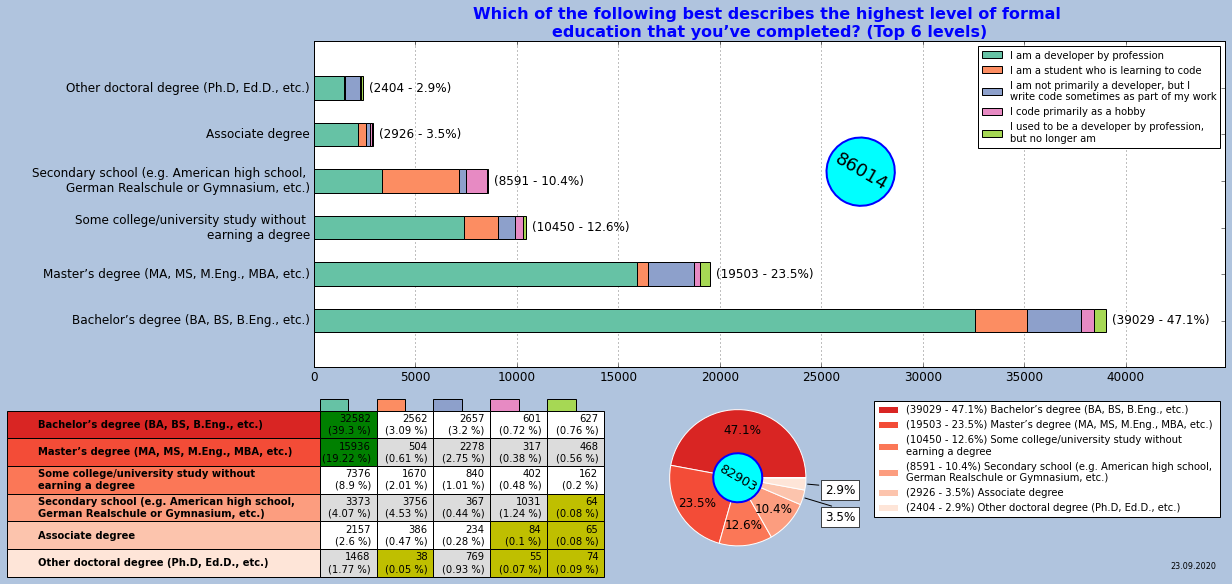

In [15]:
%matplotlib inline
fig = plt.figure(constrained_layout=True, figsize=(17,8), facecolor='lightsteelblue')
plt.figtext(0.99, 0.02, "23.09.2020", horizontalalignment='right', size=8, weight='light')
matplotlib.style.use('classic')

widths = [1.2, 1, 1.5]
heights = [2, 1]
gs_kw = dict(height_ratios=heights)
gs = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])
######################
# ax1 (top)
######################
index = np.arange(len(df_2.columns))
bar_width = 0.5
y_offset = np.zeros(len(df_2.columns))

cmap_red = plt.get_cmap('Reds')
colors_row = cmap_red(np.linspace(0.7, 0.1, len(df_2.columns)))
cmap = plt.get_cmap("Set2")
colors_column = []
for i in range(0,len(df_3.columns)):
    colors_column.append(cmap(i))

cell_text = []
for i in range(len(df_2)):
    ax1.barh(index, df_2.values[i], bar_width, left=y_offset, color=cmap(i), zorder=3)
    y_offset = y_offset + df_2.values[i]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
    
# Circle
bbox_props = dict(boxstyle="circle,pad=0.3", fc="cyan", ec="b", lw=2)
ax1.text(0.6, 0.6, df_0['count'].sum(), ha="center", va="center", rotation=-30, size=18, transform=ax1.transAxes,
            bbox=bbox_props)

total_bar_graph_annotate(df_2) #------function
######################
# ax2 (bottom-left)
######################
df_3_empty_col = [""]*(len(df_3.columns)+1)
table_1 = ax2.table(cellText=df_3_1.values, rowLabels=df_3.index, colLabels=df_3_empty_col, loc="upper left", zorder=3, 
                    rowColours=colors_row, colColours=colors_column,)

table_customization(table=table_1, df=df_3, index=df_3.index, columns=df_3.columns, min=100, max=10000) #------function
######################
# ax3 (bottom-middle)
######################
textprops = dict(horizontalalignment="center", verticalalignment="center", rotation=0, rotation_mode="anchor",
                size=12, color="black")
wedgeprops=dict(width=1, edgecolor="w", linewidth=1)

wedges, texts, autotexts = ax3.pie(df_1_1["count"], radius=1, startangle=0, 
                            autopct=lambda pct: autopct(pct, df_1_1["count"]), #------function
                            textprops=textprops, wedgeprops=wedgeprops,
                            counterclock=True, pctdistance = 0.7, colors=colors_row)

pie_annotate(ax3, df_1_1, wedges, 120, 1.5, 2) #------function

# Circle
bbox_props = dict(boxstyle="circle,pad=0.3", fc="cyan", ec="b", lw=2)
ax3.text(0, 0, df_3.sum().sum(), ha="center", va="center", rotation=-30, size=13, bbox=bbox_props)  
######################
# ax4 (bottom-right)
######################
labels = [f"({k} - {j:1.1f}%) {i}" for i,j,k in zip(lists, df_1_1["percent"], df_1_1["count"])]
ax4.legend(wedges, labels, fontsize=10, loc="upper left", prop={'size': 10})
#---------------------------------------------------------------#
########################################################################################
ax1.legend(df_2.index, fontsize=10, bbox_to_anchor=(1,1,0,0))
ax1.set_title("Which of the following best describes the highest level of formal \neducation that you’ve completed? (Top 6 levels)", fontsize=16, color='b', weight='bold')
ax1.grid(axis='x', zorder=0)
ax1.set_yticks(range(len(df_2.columns)))
ax1.set_yticklabels(df_2.columns, fontsize=12)
ax1.set_xlim([0, int(df_1_1["count"].max())*1.15])
# ax1.invert_yaxis()
ax2.axis("off")
ax3.axis("off")
ax3.axis('equal')
ax4.axis("off")
########################################################################################
plt.show()

<h1 style='color:red'>GRAPHS-2</h1>

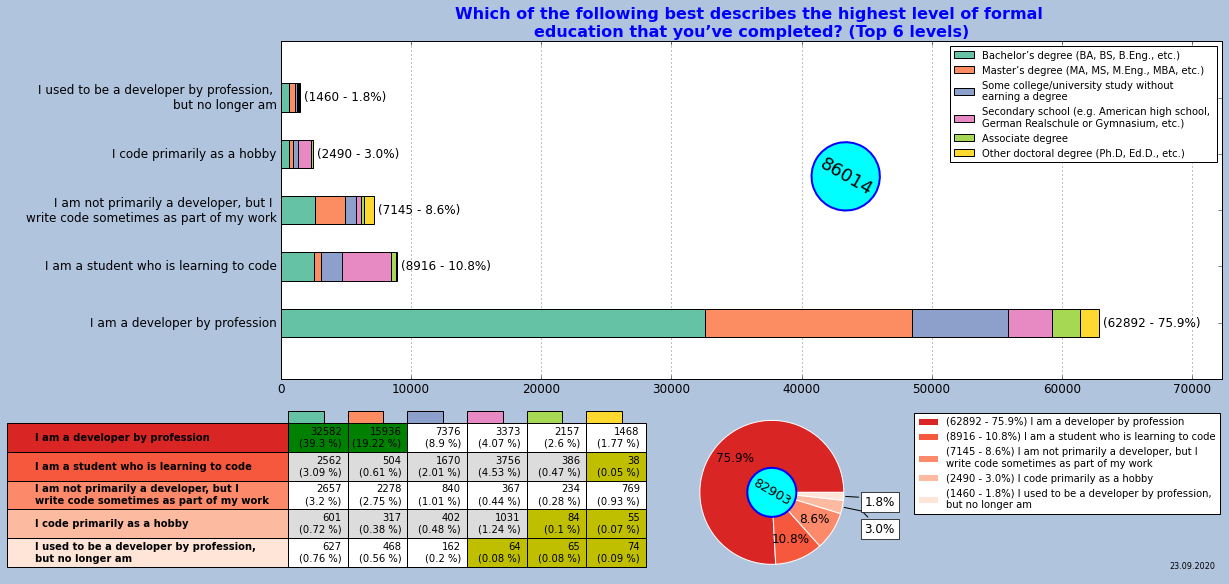

In [16]:
%matplotlib inline
fig = plt.figure(constrained_layout=True, figsize=(17,8), facecolor='lightsteelblue')
plt.figtext(0.99, 0.02, "23.09.2020", horizontalalignment='right', size=8, weight='light')
matplotlib.style.use('classic')

widths = [1.6, 1, 1.4]
heights = [2, 1]
gs_kw = dict(height_ratios=heights)
gs = fig.add_gridspec(ncols=3, nrows=2, width_ratios=widths, height_ratios=heights)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])
######################
# ax1 (top)
######################
index = np.arange(len(df_3.columns))
bar_width = 0.5
y_offset = np.zeros(len(df_3.columns))

cmap_red = plt.get_cmap('Reds')
colors_row = cmap_red(np.linspace(0.7, 0.1, len(df_3.columns)))
cmap = plt.get_cmap("Set2")    
colors_column = []
for i in range(0,len(df_2.columns)):
    colors_column.append(cmap(i))

cell_text = []
for i in range(len(df_3)):
    ax1.barh(index, df_3.values[i], bar_width, left=y_offset, color=cmap(i), zorder=3)
    y_offset = y_offset + df_3.values[i]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])

# Circle
bbox_props = dict(boxstyle="circle,pad=0.3", fc="cyan", ec="b", lw=2)
ax1.text(0.6, 0.6, df_0['count'].sum(), ha="center", va="center", rotation=-30, size=18, transform=ax1.transAxes,
            bbox=bbox_props)
    
total_bar_graph_annotate(df_3)
######################
# ax2 (bottom-left)
######################
df_2_empty_col = [""]*(len(df_2.columns)+1)
table_2 = ax2.table(cellText=df_2_1.values, rowLabels=df_2.index, colLabels=df_2_empty_col, loc="upper left", zorder=3, 
                    rowColours=colors_row, colColours=colors_column,)

table_customization(table=table_2, df=df_2, index=df_2.index, columns=df_2.columns, min=100, max=10000)
######################
# ax3 (bottom-middle)
######################
textprops = dict(horizontalalignment="center", verticalalignment="center", rotation=0, rotation_mode="anchor",
                size=12, color="black")
wedgeprops=dict(width=1, edgecolor="w", linewidth=1)

wedges, texts, autotexts = ax3.pie(df_1_2["count"], radius=1, startangle=0, 
                            autopct=lambda pct: autopct(pct, df_1_2["count"]), #------function
                            textprops=textprops, wedgeprops=wedgeprops,
                            counterclock=True, pctdistance = 0.7, colors=colors_row)

pie_annotate(ax3, df_1_2, wedges, 135, 1.5, 2.5) #------function

# Circle
bbox_props = dict(boxstyle="circle,pad=0.3", fc="cyan", ec="b", lw=2)
ax3.text(0, 0, df_3.sum().sum(), ha="center", va="center", rotation=-30, size=13, bbox=bbox_props)    

######################
# ax4 (bottom-right)
######################

# labels_OS_1 = [f"({i:}) {j}" for i,j in zip(df_1_2.values, df_1_2.index)]
# ax4.legend(pie[0], labels_OS_1, fontsize=10, loc="upper left")

labels = [f"({k} - {j:1.1f}%) {i}" for i,j,k in zip(df_1_2["MainBranch"], df_1_2["percent"], df_1_2["count"])]
ax4.legend(wedges, labels, fontsize=10, loc="upper left", prop={'size': 10})
#---------------------------------------------------------------#
########################################################################################
ax1.legend(df_3.index, fontsize=10, bbox_to_anchor=(1,1,0,0))
ax1.set_title("Which of the following best describes the highest level of formal \neducation that you’ve completed? (Top 6 levels)", fontsize=16, color='b', weight='bold')
ax1.grid(axis='x', zorder=0)
ax1.set_yticks(range(len(df_3.columns)))
ax1.set_yticklabels(df_3.columns, fontsize=12)
ax1.set_xlim([0, int(df_1_2["count"].max())*1.15])
ax2.axis("off")
ax3.axis('equal')
ax4.axis("off")
########################################################################################
plt.show()